In [1]:
#  Importing All libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix

 

In [2]:
# Reading dataset 
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


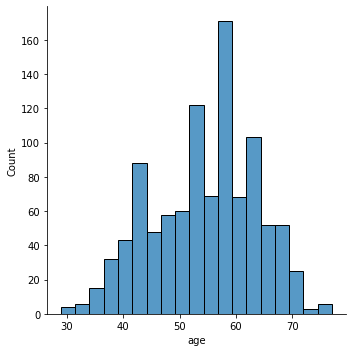

In [4]:
sns.displot(df['age'])
plt.show()

In [5]:
df.shape

(1025, 14)

In [6]:
# Statistical description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#  Display patients genderwise
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [8]:
df['sex'].value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [9]:
df['sex'].value_counts().values

array([713, 312], dtype=int64)

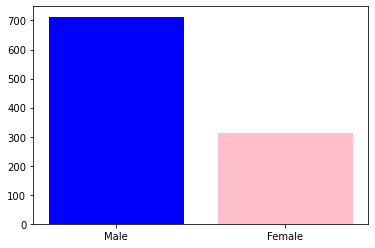

In [10]:
plt.bar(list(("Male","Female")),list(df['sex'].value_counts()), color=['blue', 'pink'])
plt.show()

In [11]:
# Display chest pain levels
cp_counts = df['cp'].value_counts()

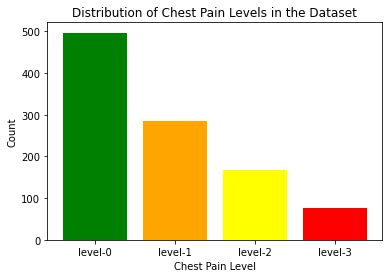

In [12]:
plt.bar(['level-0', 'level-1', 'level-2', 'level-3'], cp_counts, color=['green', 'orange', 'yellow', 'red'])
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Levels in the Dataset')

plt.show()

C:\Users\biraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

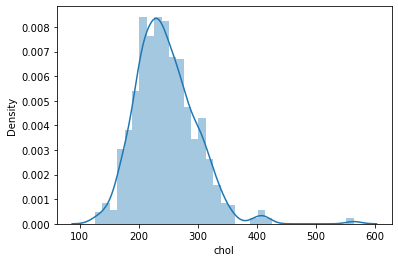

In [13]:
#  Distribution plot
sns.distplot(df['chol'])

In [14]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

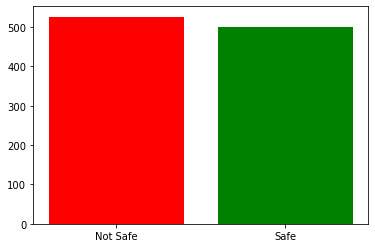

In [15]:
plt.bar(["Not Safe", "Safe"], list(df['target'].value_counts()), color=['red', 'green'])
plt.show()

In [16]:
x=df[['age']]    #Dependent variable
y=df[['target']]    #Independent Variable


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
#   Multinomial Naive bayes

In [19]:
mnb=MultinomialNB()

In [20]:
mnb.fit(x_train,y_train)

C:\Users\biraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [21]:
y_pred=mnb.predict(x_test)

In [22]:
y_test.head(),y_pred[0:5]

(     target
 263       1
 723       1
 922       1
 279       1
 459       1,
 array([1, 1, 1, 1, 1], dtype=int64))

In [23]:
#  Confusion matrix
confusion_matrix(y_test,y_pred)

array([[  0, 150],
       [  0, 158]], dtype=int64)

In [24]:
# Accuracy = (True Positives + True Negatives) / Total
(167)/(167+141)

0.5422077922077922

In [25]:
x=df[['age','trestbps','chol']]

In [26]:
x.head()

,age,trestbps,chol
0,52,125,212
1,53,140,203
2,70,145,174
3,61,148,203
4,62,138,294


In [27]:
y=df[['target']]

In [28]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [30]:
#  Gaussian Naive bayes
gnb=GaussianNB()

In [31]:
gnb.fit(x_train,y_train)

C:\Users\biraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
y_pred=gnb.predict(x_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[133,  66],
       [ 86, 125]], dtype=int64)

In [34]:
(117+142)/(59+92+142+117)

0.6317073170731707

In [35]:
x = df[['age', 'trestbps', 'chol']]
y = df[['target']]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [37]:
#  Bernolli Naive Bayes
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

C:\Users\biraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [38]:
y_pred=gnb.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[147,  61],
       [ 79, 123]], dtype=int64)

In [40]:
(139+115)/(139+77+79+115)

0.6195121951219512

In [ ]:
#  Accuracy Multinomial: 0.5422077922077922
# Accuracy Bernolli: 0.6195121951219512
# Accuracy Gaussian: 0.6317073170731707